In [3]:
import pandas as pd
import numpy as np

from sklearn import metrics

from sklearn.datasets import load_boston

boston = load_boston()
data = pd.DataFrame(boston.data)



In [4]:
data.columns = boston.feature_names

data['price'] = boston.target

In [5]:
X = data.drop(['price'],axis=1)
y = data['price']


In [6]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
182,0.09103,0.0,2.46,0.0,0.4880,7.155,92.2,2.7006,3.0,193.0,17.8,394.12,4.82
155,3.53501,0.0,19.58,1.0,0.8710,6.152,82.6,1.7455,5.0,403.0,14.7,88.01,15.02
280,0.03578,20.0,3.33,0.0,0.4429,7.820,64.5,4.6947,5.0,216.0,14.9,387.31,3.76
126,0.38735,0.0,25.65,0.0,0.5810,5.613,95.6,1.7572,2.0,188.0,19.1,359.29,27.26
329,0.06724,0.0,3.24,0.0,0.4600,6.333,17.2,5.2146,4.0,430.0,16.9,375.21,7.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0.0,0.5200,5.836,91.9,2.2110,5.0,384.0,20.9,395.67,18.66
270,0.29916,20.0,6.96,0.0,0.4640,5.856,42.1,4.4290,3.0,223.0,18.6,388.65,13.00
348,0.01501,80.0,2.01,0.0,0.4350,6.635,29.7,8.3440,4.0,280.0,17.0,390.94,5.99
435,11.16040,0.0,18.10,0.0,0.7400,6.629,94.6,2.1247,24.0,666.0,20.2,109.85,23.27


In [7]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression().fit(X_train,y_train)


In [12]:
pred = lreg.predict(X_train)

print("Training set score:{:.2f}".format(lreg.score(X_train,y_train)*100))
print("\nTesting set score:{:.2f}".format(lreg.score(X_test,y_test)*100))

print("\nMean absolute error:{:.2f}".format(metrics.mean_absolute_error(y_train,pred)))
print("\n Mean squared error:{:.2f}".format(metrics.mean_squared_error(y_train,pred)))

print("\n RMS:{:.2f}".format(metrics.mean_squared_error(y_train,pred)))


Training set score:74.81

Testing set score:68.44

Mean absolute error:3.37

 Mean squared error:22.34

 RMS:22.34


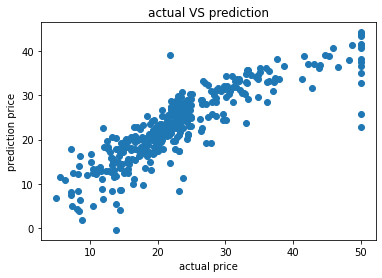

In [13]:
import matplotlib.pyplot as plt

plt.scatter(y_train,pred)
plt.xlabel("actual price")
plt.ylabel("prediction price")

plt.title("actual VS prediction")
plt.show()